In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/CVR/Downloads/archive/GlobalLandTemperaturesByCity.csv')

In [3]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [4]:
df.isna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False
2,False,True,True,False,False,False,False
3,False,True,True,False,False,False,False
4,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False
8599210,False,False,False,False,False,False,False


In [6]:
df=df.dropna(subset=['AverageTemperature'])

In [7]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [11]:
df.loc[:, 'dt'] = pd.to_datetime(df['dt']) 

In [12]:
df.loc[:, 'year'] = df['dt'].dt.year

In [31]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


In [13]:
avg = df.groupby(['City','year'])['AverageTemperature'].mean().reset_index()

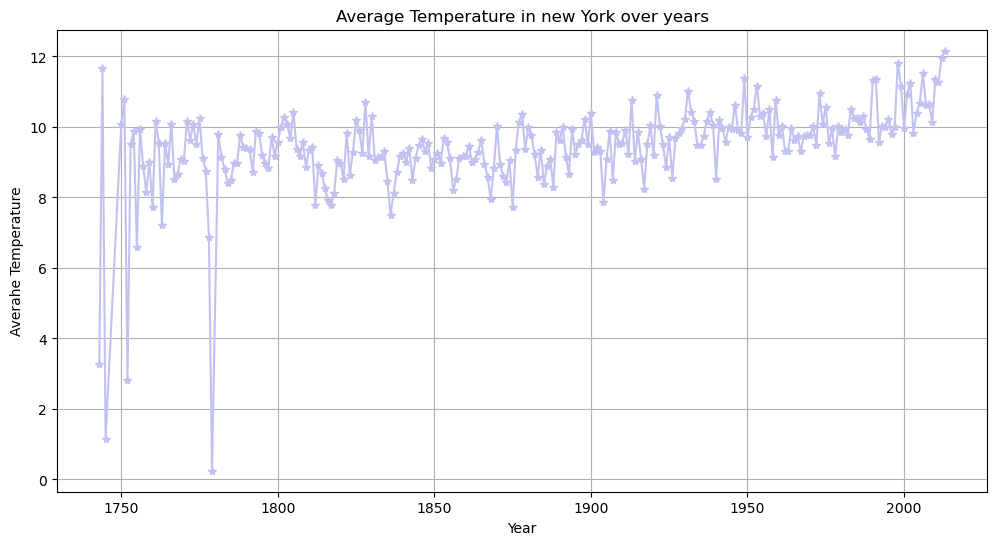

In [65]:
city_data = avg[avg['City'] == 'New York']
plt.figure(figsize=(12,6))
plt.plot(city_data['year'], city_data['AverageTemperature'],marker='*',color='#c2c2f0')
plt.title('Average Temperature in new York over years')
plt.xlabel('Year')
plt.ylabel('Averahe Temperature')
plt.grid(True)
plt.show()

In [16]:
country_average_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()

In [17]:
country_average_temp = country_average_temp.dropna()

In [18]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


In [22]:
top = country_average_temp.sort_values(by='AverageTemperature',ascending=False).head(10)

In [24]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


Text(0, 0.5, 'Average Temperature')

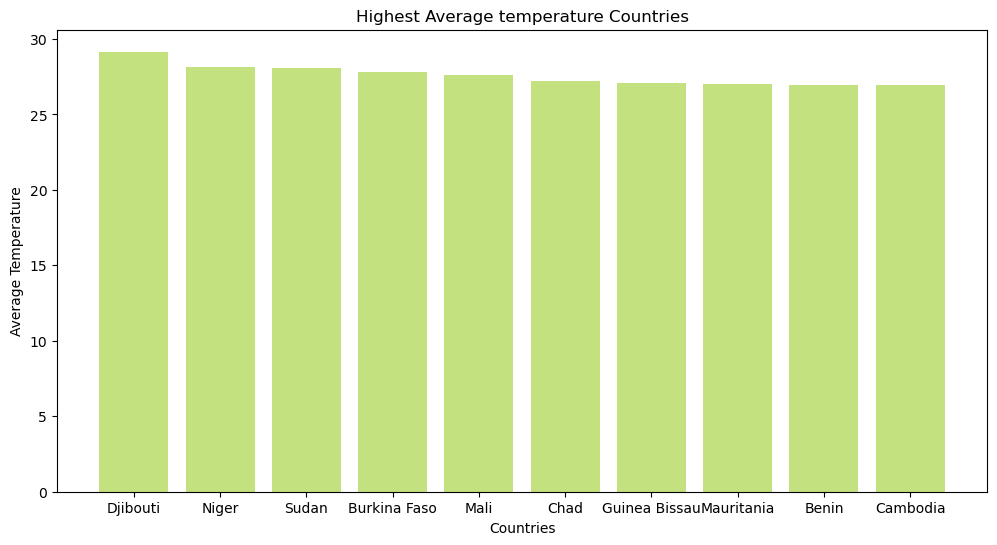

In [62]:
plt.figure(figsize=(12,6))
plt.bar(top['Country'], top['AverageTemperature'], color='#c4e17f')
plt.title("Highest Average temperature Countries")
plt.xlabel('Countries')
plt.ylabel("Average Temperature")

In [38]:
temp = df['AverageTemperature'].dropna()

In [39]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


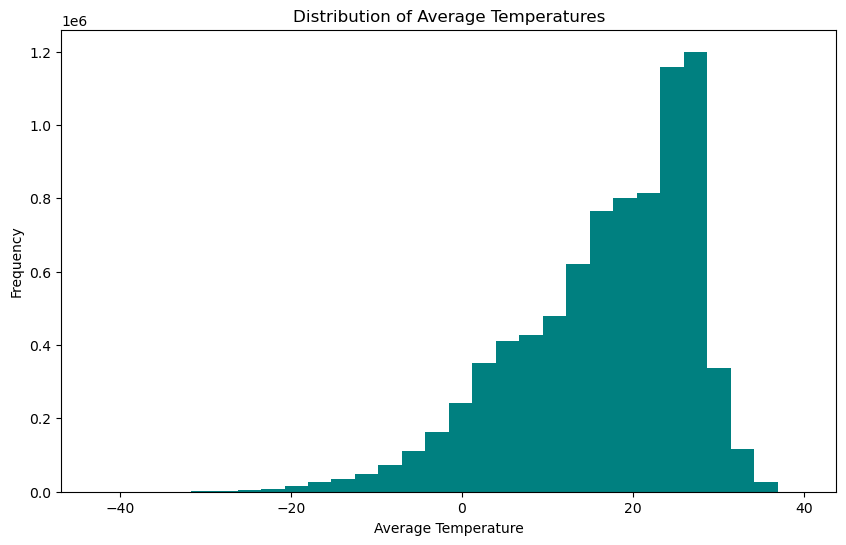

In [60]:
plt.figure(figsize=(10,6))
plt.hist(temp, bins=30,color='teal')
plt.title('Distribution of Average Temperatures')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

In [49]:
avg_temp = df['AverageTemperature'].dropna()
avg_temp_uncertainity = df['AverageTemperatureUncertainty'].dropna()

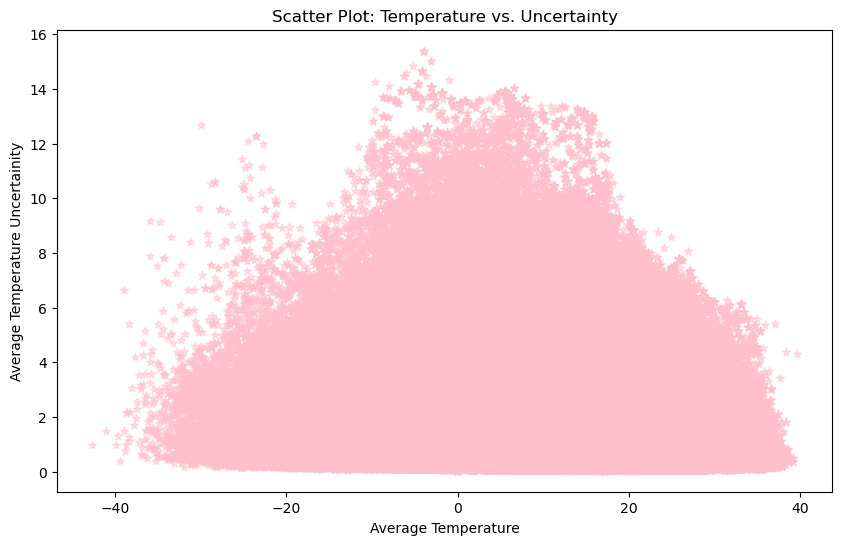

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(avg_temp,avg_temp_uncertainity,color='pink',alpha=0.5,marker='*')
plt.title('Scatter Plot: Temperature vs. Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('Average Temperature Uncertainity')
plt.show()

In [56]:
correlation = df[['AverageTemperature', 'AverageTemperatureUncertainty']].corr()

In [57]:
correlation

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.228159
AverageTemperatureUncertainty,-0.228159,1.000000


In [94]:
cd = df[df['Country'] == 'Denmark'].dropna()

In [97]:
cd['Year'] = pd.to_datetime(cd['dt']).dt.year
temperature_data = cd[['Year', 'AverageTemperature']]

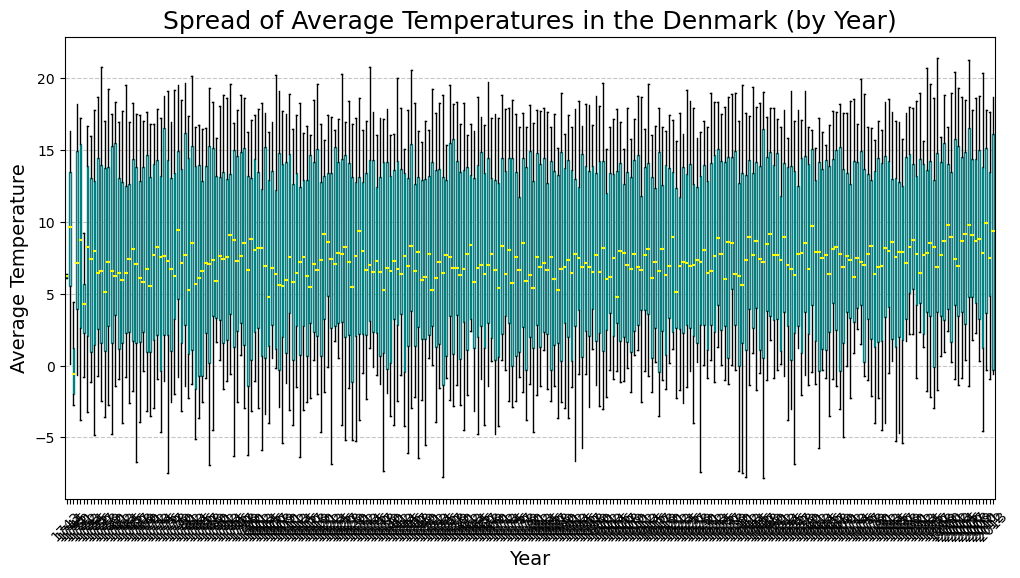

In [109]:
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='pink', color='teal'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)

plt.title('Spread of Average Temperatures in the Denmark (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


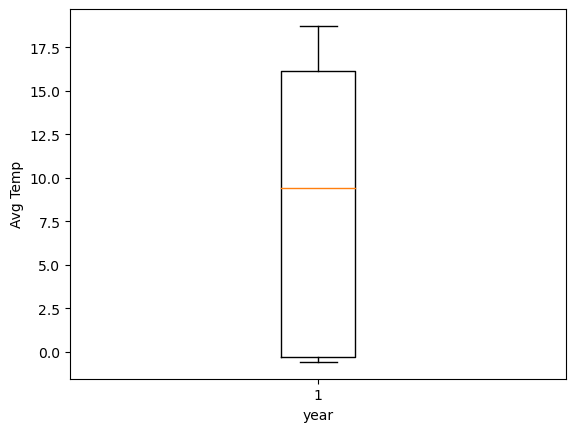

In [107]:
country='Denmark'
yr=2013
a=cd[(cd['Country']==country) & (cd['year']==yr)]
a
plt.boxplot(x=a['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('Avg Temp')
plt.show()